# Exploration of Parcel Data ~ 2016  

This data comes from the Utah AGRC Resource. Wanting to find out if we can see housing information back to the 90s. Known we will lose data from any houses which have been destroyed. 

Data Link: https://gis.utah.gov/data/cadastre/parcels/ 

UBOX: /Census_Files_AGRC_Parcel_Data

Last Edited: 03.18.20

GL

In [2]:
#Libraries:
import geopandas as gpd
import fiona
import descartes
import contextily as ctx #Basemaps 
import matplotlib.pyplot as plt

In [2]:
box_elder_parcels =fiona.open('Parcels_BoxElder_LIR.gdb')
box_elder_parcels.driver # OpenFileGDB
box_elder_parcels.schema # {'geometry': '3D MultiLineString', 'properties': OrderedDict([(u'FCSubtype', 'int'), ...
box_elder_parcels.crs # {'init': u'epsg:4326'}

{'init': 'epsg:26912'}

In [3]:
# Build the GeoDataFrame from Fiona Collection
box_elder_gdf = gpd.GeoDataFrame.from_features([feature for feature in box_elder_parcels], crs=box_elder_parcels.crs)
# Get the order of the fields in the Fiona Collection; add geometry to the end
columns = list(box_elder_parcels.meta["schema"]["properties"]) + ["geometry"]
# Re-order columns in the correct order
box_elder_gdf = box_elder_gdf[columns]

/home/boogie2/anaconda3/envs/lab_basic/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
#What are the columns
box_elder_gdf.columns

Index(['COUNTY_NAME', 'COUNTY_ID', 'ASSESSOR_SRC', 'BOUNDARY_SRC',
       'DISCLAIMER', 'CURRENT_ASOF', 'PARCEL_ID', 'SERIAL_NUM', 'PARCEL_ADD',
       'PARCEL_CITY', 'TAXEXEMPT_TYPE', 'TAX_DISTRICT', 'TOTAL_MKT_VALUE',
       'LAND_MKT_VALUE', 'PARCEL_ACRES', 'PROP_CLASS', 'PRIMARY_RES',
       'HOUSE_CNT', 'SUBDIV_NAME', 'BLDG_SQFT', 'BLDG_SQFT_INFO', 'FLOORS_CNT',
       'FLOORS_INFO', 'BUILT_YR', 'EFFBUILT_YR', 'CONST_MATERIAL',
       'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')

In [5]:
box_elder_gdf.head(3)

,COUNTY_NAME,COUNTY_ID,ASSESSOR_SRC,BOUNDARY_SRC,DISCLAIMER,CURRENT_ASOF,PARCEL_ID,SERIAL_NUM,PARCEL_ADD,PARCEL_CITY,...,BLDG_SQFT,BLDG_SQFT_INFO,FLOORS_CNT,FLOORS_INFO,BUILT_YR,EFFBUILT_YR,CONST_MATERIAL,Shape_Length,Shape_Area,geometry
0,BoxElder,1,http://www.boxeldercounty.org/assessors.htm,http://www.boxeldercounty.org/recorder.htm,http://www.utah.gov/disclaimer.html,2016-08-17T00:00:00,Parcel_Num,01-001-0006,26915 S PILOT MOUNTAIN RD GROUSE CREEK UT 84313,None,...,0.0,None,None,Ranch 1 Story,1930,None,None,2536.471128,3.695637e+05,"MULTIPOLYGON (((250051.360 4543455.173, 250458..."
1,BoxElder,1,http://www.boxeldercounty.org/assessors.htm,http://www.boxeldercounty.org/recorder.htm,http://www.utah.gov/disclaimer.html,2016-08-17T00:00:00,Parcel_Num,01-001-0002,None,None,...,NaN,None,None,None,None,None,None,6377.010551,2.540776e+06,"MULTIPOLYGON (((342315.755 4543128.516, 342316..."
2,BoxElder,1,http://www.boxeldercounty.org/assessors.htm,http://www.boxeldercounty.org/recorder.htm,http://www.utah.gov/disclaimer.html,2016-08-17T00:00:00,Parcel_Num,01-001-0003,None,None,...,NaN,None,None,None,None,None,None,5794.018249,2.073500e+06,"MULTIPOLYGON (((247617.151 4543828.897, 247589..."


In [6]:
print("There are {0} rows and {1} columns for Box Elder County".format(box_elder_gdf.shape[0],box_elder_gdf.shape[1]))

There are 44231 rows and 29 columns for Box Elder County


In [7]:
box_elder_gdf.isna().sum().sort_values()

COUNTY_NAME            0
Shape_Length           0
Shape_Area             0
TOTAL_MKT_VALUE        0
SERIAL_NUM             0
PARCEL_ID              0
geometry               0
DISCLAIMER             0
COUNTY_ID              0
CURRENT_ASOF           0
ASSESSOR_SRC           0
BOUNDARY_SRC           0
LAND_MKT_VALUE      3776
PARCEL_ACRES        3776
TAX_DISTRICT        3776
PARCEL_ADD         25734
PROP_CLASS         27253
FLOORS_INFO        27253
BUILT_YR           27253
BLDG_SQFT          27262
TAXEXEMPT_TYPE     44231
PRIMARY_RES        44231
PARCEL_CITY        44231
SUBDIV_NAME        44231
BLDG_SQFT_INFO     44231
FLOORS_CNT         44231
EFFBUILT_YR        44231
CONST_MATERIAL     44231
HOUSE_CNT          44231
dtype: int64

Not all places have tax district numbers or addresses... What do these represent?  

## Visualization:

/home/boogie2/anaconda3/envs/lab_basic/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


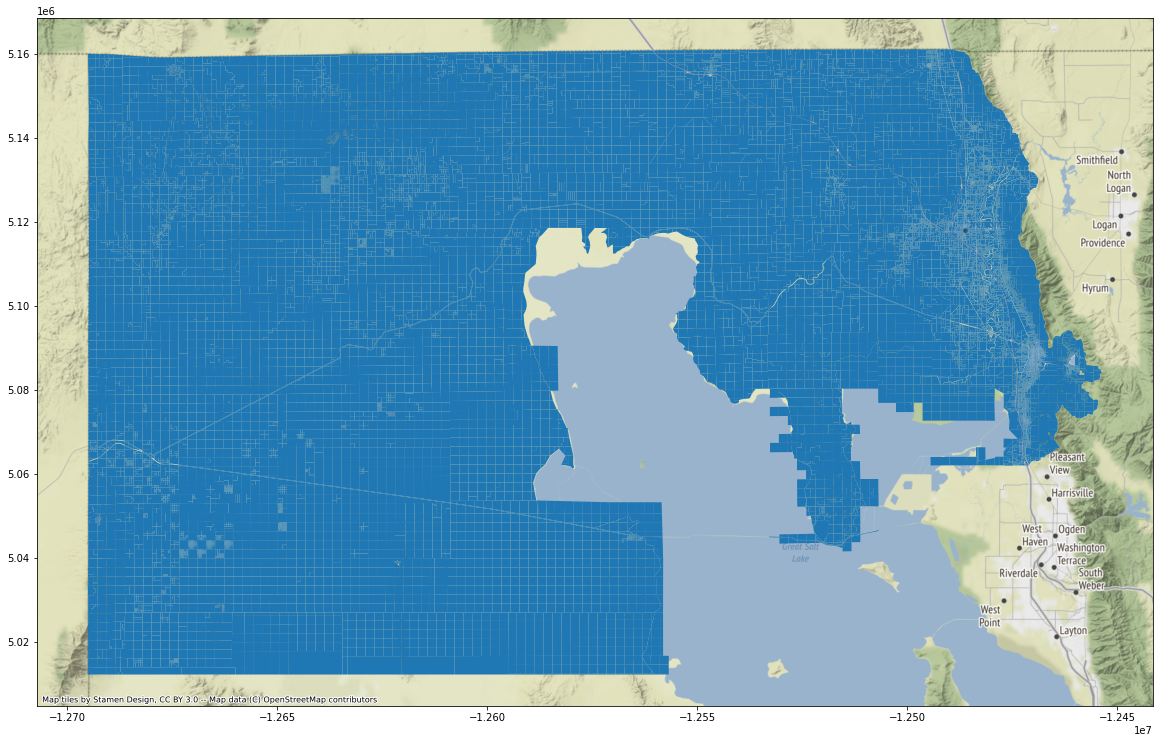

In [8]:
#Let's Visualize all the land
box_elder_gdf = box_elder_gdf.to_crs({'init': 'epsg:3857'})
fig, ax = plt.subplots(1,1,figsize = (20,20)) 
box_elder_gdf.plot(ax = ax)
ctx.add_basemap(ax)

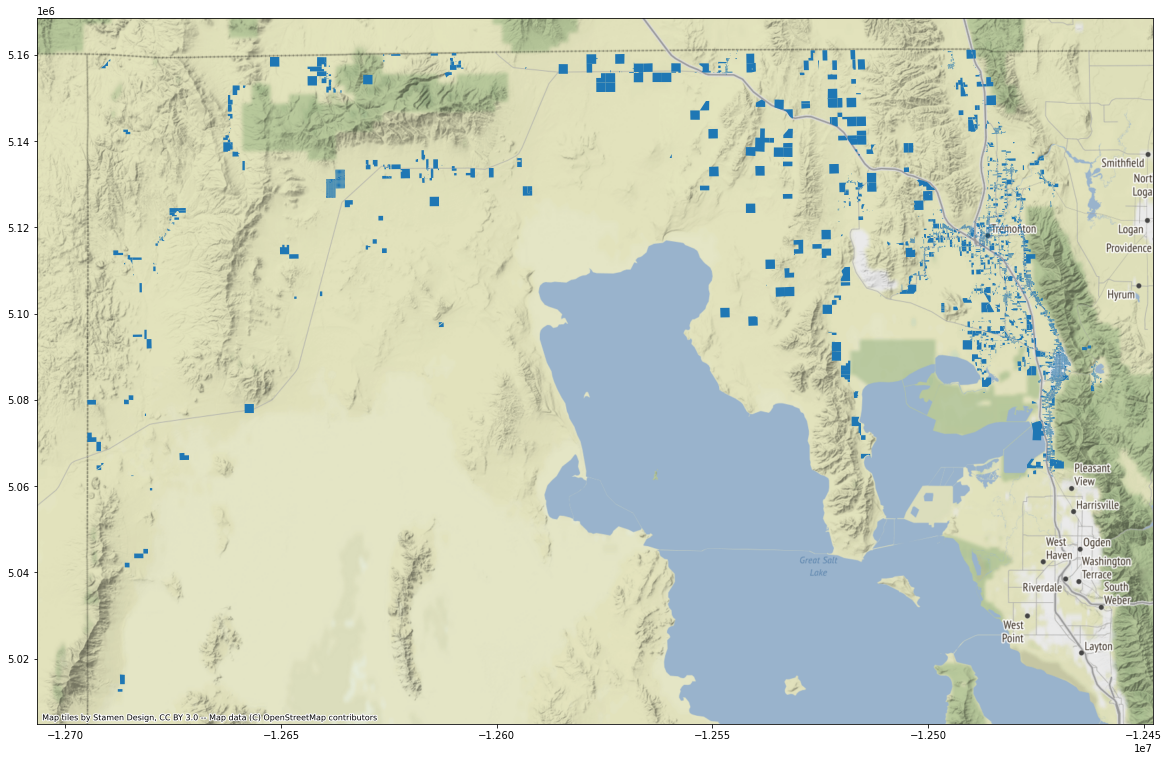

In [9]:
#Let's take only the areas which have parcel addresses:
prop = box_elder_gdf[box_elder_gdf['PARCEL_ADD'].notna()]

fig, ax = plt.subplots(1,1,figsize = (20,20)) 
prop.plot(ax = ax)
ctx.add_basemap(ax)

**CONCLUSION** This data looks promising. It has the addresses of all land in Utah. We should be able to glean some information from this concerning the housing build year and story. Not sure if we will be able to glean the necessary basement information. But this is a start at least. 

# Updates: 04.01.20 (april fools)

1. Chloropleth map with housing year (binned into ten year increments
2. Categorical variable for type of parcel (only want residential)
3. (maps?)
4. Water table maps? Places to look for ruling out basements



### Grab the Data 

In [4]:
import os
import pandas as pd
path = "./2016_parcel_gdb" 
for index, file in enumerate(sorted(os.listdir(path))):
    print(file)
    
    try: 
        #Download the Data:
        temp_county =fiona.open(path + '/' + file)


        # Build the GeoDataFrame from Fiona Collection
        temp_count_df = gpd.GeoDataFrame.from_features([feature for feature in temp_county], 
                                                       crs=temp_county.crs)
        # Get the order of the fields in the Fiona Collection; add geometry to the end
        columns = list(temp_county.meta["schema"]["properties"]) + ["geometry"]

        # Re-order columns in the correct order
        temp_count_df = temp_count_df[columns]

        if index == 0:
            count_df = temp_count_df

        else:
            count_df = pd.concat([count_df, temp_count_df], axis=0)
            
    except:
        print('error with {0}'.format(file))

Parcels_Beaver_LIR.gdb


/home/boogie2/anaconda3/envs/lab_basic/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Parcels_BoxElder_LIR.gdb
Parcels_Cache_LIR.gdb
Parcels_Daggett_LIR.gdb
Parcels_Davis_LIR.gdb
Parcels_Garfield_LIR.gdb
Parcels_Iron_LIR.gdb
Parcels_Juab_LIR.gdb
Parcels_Kane_LIR.gdb
Parcels_Millard_LIR.gdb
Parcels_Morgan_LIR.gdb
Parcels_SaltLake_LIR.gdb
error with Parcels_SaltLake_LIR.gdb
Parcels_Sanpete_LIR.gdb
Parcels_Summit_LIR.gdb
Parcels_Tooele_LIR.gdb
Parcels_Utah_LIR.gdb
Parcels_Wasatch_LIR.gdb
error with Parcels_Wasatch_LIR.gdb
Parcels_Washington_LIR.gdb
Parcels_Weber_LIR.gdb


In [6]:
#Did we get the data?
count_df['COUNTY_NAME'].drop_duplicates()

0        Beaver
0      BoxElder
0         Cache
0       Daggett
0         Davis
0      Garfield
0          Iron
0          Juab
0          Kane
0       Millard
0        Morgan
0       Sanpete
0        Summit
0        Tooele
0          Utah
0    WASHINGTON
0           NaN
Name: COUNTY_NAME, dtype: object

### Conclusion: 
There are issues downloading the salt lake and wasatch parcels. This is most likely due to issues handling empty layers. I would like to try importing with shapefiles as this seems more ammenable with geopandas. 

## Exploratory Analysis on all Data:

In [7]:
print("There are {0} rows and {1} columns for all Utah Counties (excluding Salt Lake and Wasatch)".format(
    count_df.shape[0],count_df.shape[1]))

There are 845557 rows and 48 columns for all Utah Counties (excluding Salt Lake and Wasatch)


In [8]:
count_df.isna().sum().sort_values()

COUNTY_ID               0
geometry                0
DISCLAIMER          94101
Shape_Length        94101
Shape_Area          94101
COUNTY_NAME        106686
ASSESSOR_SRC       106686
BOUNDARY_SRC       106686
CURRENT_ASOF       106686
PARCEL_ADD         111229
PROP_CLASS         126806
PARCEL_ID          132530
PARCEL_ACRES       141036
TOTAL_MKT_VALUE    153098
LAND_MKT_VALUE     160496
TAX_DISTRICT       198221
BLDG_SQFT          224391
BUILT_YR           229870
SERIAL_NUM         293675
PARCEL_CITY        434731
SUBDIV_NAME        453094
TAXEXEMPT_TYPE     502501
FLOORS_CNT         657936
FLOORS_INFO        734478
PRIMARY_RES        735800
BLDG_SQFT_         738871
HOUSING_CN         738871
PARCEL_ACR         738871
PARCEL_I_1         738871
SUDIV_NAME         738871
LAND_MKT_V         738871
TOTAL_MKT_         738871
TAX_DISTRI         738871
TAXEXEMPT_         738871
CURRENT_AS         738871
CONST_MATE         738871
ASSESSOR_S         738871
COUNTY_NAM         738871
EFFBUILT_Y  

In [9]:
#Map to Coordinates 
count_df = count_df.to_crs({'init': 'epsg:3857'})

#Select only properties which have a parcel address:
test_slice = count_df[count_df['PARCEL_ADD'].notna()]

In [10]:
#Which Columns may have nulls? 
test_slice.isna().sum().sort_values()

COUNTY_ID               0
geometry                0
PARCEL_ADD              0
PROP_CLASS          66912
DISCLAIMER          94101
Shape_Area          94101
Shape_Length        94101
COUNTY_NAME        106686
ASSESSOR_SRC       106686
BOUNDARY_SRC       106686
CURRENT_ASOF       106686
PARCEL_ACRES       115575
PARCEL_ID          119178
TOTAL_MKT_VALUE    130895
LAND_MKT_VALUE     133496
BLDG_SQFT          141213
BUILT_YR           154207
TAX_DISTRICT       178574
SERIAL_NUM         261914
PARCEL_CITY        338388
SUBDIV_NAME        348987
TAXEXEMPT_TYPE     396747
FLOORS_CNT         547998
FLOORS_INFO        624216
PARCEL_I_1         627642
CURRENT_AS         627642
BOUNDARY_S         627642
ASSESSOR_S         627642
COUNTY_NAM         627642
TOTAL_MKT_         627642
CONST_MATE         627642
PARCEL_ACR         627642
TAXEXEMPT_         627642
HOUSING_CN         627642
BLDG_SQFT_         627642
EFFBUILT_Y         627642
SUDIV_NAME         627642
LAND_MKT_V         627642
TAX_DISTRI  

In [34]:
#We want to look at these locations, with a heatmap of built year: 

#First fill any missing values for year with a -1. Keep in mind several of these values have 0's as well. 
test_slice['BUILT_YR'] = test_slice['BUILT_YR'].fillna('-1').astype(int)

#Upon looking at this data, there are houses with years that go above 2020 and below 1607. Thus to do a rough scrub
#of the data, i pull only those shapes which have a build year within an logical range. 
potential_houses_with_year = test_slice[(test_slice['BUILT_YR']>1607) & (test_slice['BUILT_YR']<2021)]

<ipython-input-34-3bb2aa208b64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_slice['BUILT_YR'] = test_slice['BUILT_YR'].fillna('-1').astype(int)


In [41]:
#This leaves us with us with 330,962 land masses which have parcel addresses
potential_houses_with_year['COUNTY_NAME'].dropna().shape

(330962,)

In [45]:
potential_houses_with_year.head(5)

,COUNTY_NAME,COUNTY_ID,ASSESSOR_SRC,BOUNDARY_SRC,DISCLAIMER,CURRENT_ASOF,PARCEL_ID,SERIAL_NUM,PARCEL_ADD,PARCEL_CITY,...,TAXEXEMPT_,TAX_DISTRI,TOTAL_MKT_,LAND_MKT_V,PARCEL_ACR,HOUSING_CN,BLDG_SQFT_,SUDIV_NAME,EFFBUILT_Y,CONST_MATE
13,Beaver,1,http://beaver.utah.gov/index.aspx?NID=117,http://beaver.utah.gov/index.aspx?NID=123,http://www.utah.gov/disclaimer.html,2016-10-03T00:00:00,01-0115-0001,708,882 W HWY 21,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Beaver,1,http://beaver.utah.gov/index.aspx?NID=117,http://beaver.utah.gov/index.aspx?NID=123,http://www.utah.gov/disclaimer.html,2016-10-03T00:00:00,01-0115-0003,708-B,879 W 225 N,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Beaver,1,http://beaver.utah.gov/index.aspx?NID=117,http://beaver.utah.gov/index.aspx?NID=123,http://www.utah.gov/disclaimer.html,2016-10-03T00:00:00,01-0073-0004,202-B,249 E KENT LN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Beaver,1,http://beaver.utah.gov/index.aspx?NID=117,http://beaver.utah.gov/index.aspx?NID=123,http://www.utah.gov/disclaimer.html,2016-10-03T00:00:00,01-0068-0012,,T28S R7W S22,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,Beaver,1,http://beaver.utah.gov/index.aspx?NID=117,http://beaver.utah.gov/index.aspx?NID=123,http://www.utah.gov/disclaimer.html,2016-10-03T00:00:00,01-0068-0002,180-1,391 N MAIN,MANDERFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


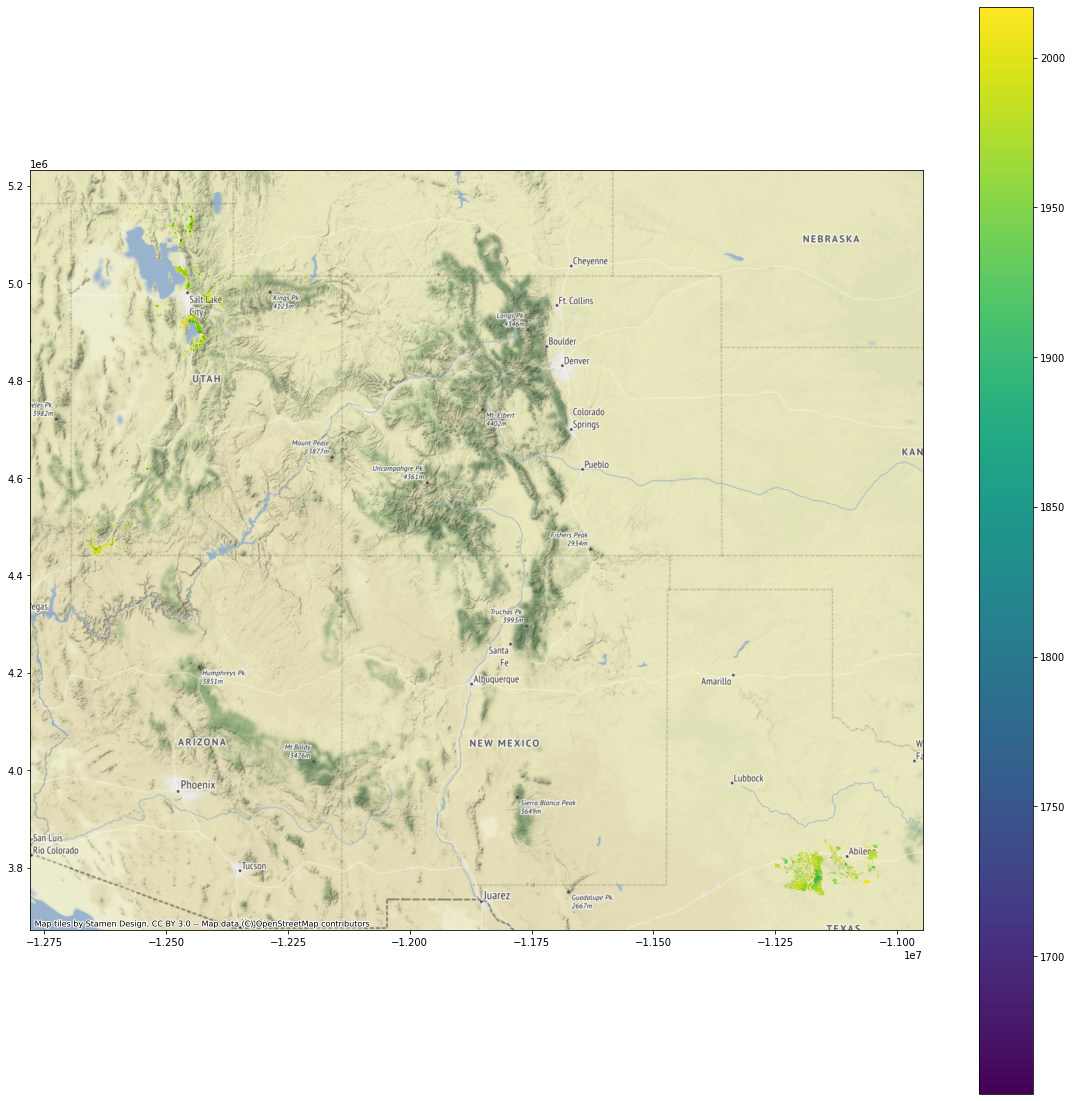

In [44]:
#plotting this yields this: 
fig, ax = plt.subplots(1,1,figsize = (20,20)) 
potential_houses_with_year.plot(ax = ax,column = 'BUILT_YR',legend=True)
ctx.add_basemap(ax)

### Conclusion:

1. This data is messy. We need to resolve: 
    - Why are some locations mapped to texas?
    - Why can't we download all gdb files?
    - Why do some counties not have names but ID's? Are these still meaningful?
    - For those properties that don't have a build year, are these properties houses? Or will be plan to exclude them

